In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('/content/flight_dataset.csv')

In [5]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


##Data Preprocessing

In [6]:
#Cleaning
#Missing value
#Duplicate
#Dtypes
#Outliers
#Structured

In [7]:
#Missing value
df.isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [8]:
#Duplicate
df=df.drop_duplicates()
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [9]:
#Dtypes
df.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hours          int64
Dep_min            int64
Arrival_hours      int64
Arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object

In [10]:
#Structured
#Yes,its a structured dataset

In [11]:
#Outliers
# from scipy import stats
# for col in ['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']:
#     z = np.abs(stats.zscore(df[col]))
#     threshold = 3
#     outliers = np.where(z > threshold)
#     print(f"Outliers in {col}: {outliers}")

In [12]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming your DataFrame is named 'df' and you want to test the 'Price' column
data = ['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours',
        'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']
for i in data:
  # 1. Create a histogram to get observed frequencies
  observed_frequencies, bins = np.histogram(df[i], bins='auto') # Use 'auto' for binning

  # 2. Calculate expected frequencies
  expected_frequencies = np.ones_like(observed_frequencies) * len(df[i]) / len(observed_frequencies)

  # 3. Perform the Chi-Square test
  chi2, p_value = stats.chisquare(observed_frequencies, expected_frequencies)

  # 4. Print the results
  print(f"Chi-Square Test for {i}: Statistic={chi2}, p-value={p_value}")

  # 5. Interpret the results
  alpha = 0.05  # Set your significance level
  if p_value < alpha:
      print("Reject the null hypothesis: The data is likely not uniformly distributed.")
  else:
      print("Fail to reject the null hypothesis: The data may be uniformly distributed.")

Chi-Square Test for Total_Stops: Statistic=180717.039957939, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square Test for Price: Statistic=51305.50415830227, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square Test for Date: Statistic=9918.705859860434, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square Test for Month: Statistic=33729.70404359048, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square Test for Year: Statistic=0.0, p-value=nan
Fail to reject the null hypothesis: The data may be uniformly distributed.
Chi-Square Test for Dep_hours: Statistic=4553.889398719051, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square Test for Dep_min: Statistic=8519.209349010613, p-value=0.0
Reject the null hypothesis: The data is likely not uniformly distributed.
Chi-Square

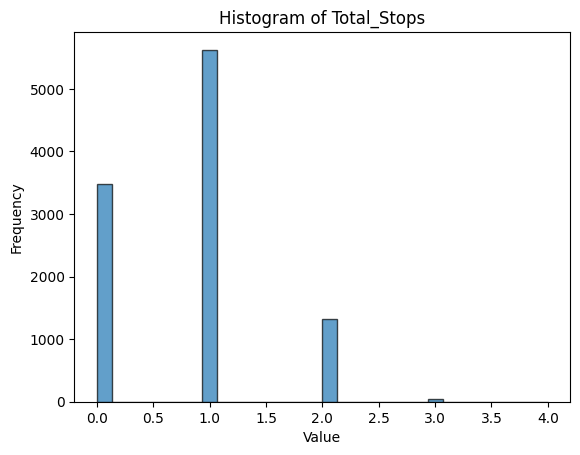

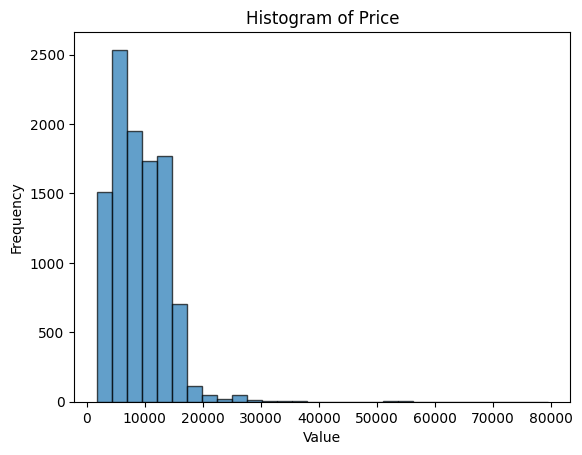

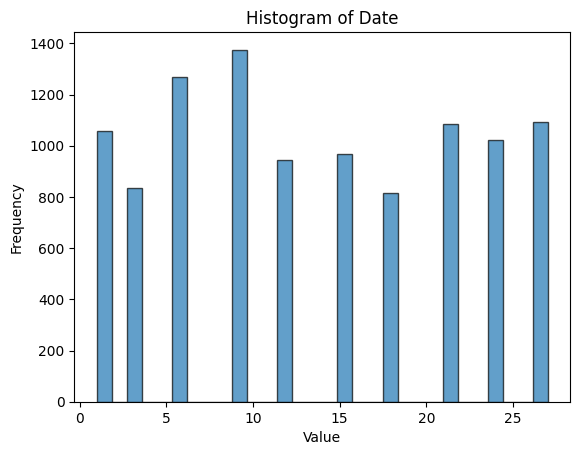

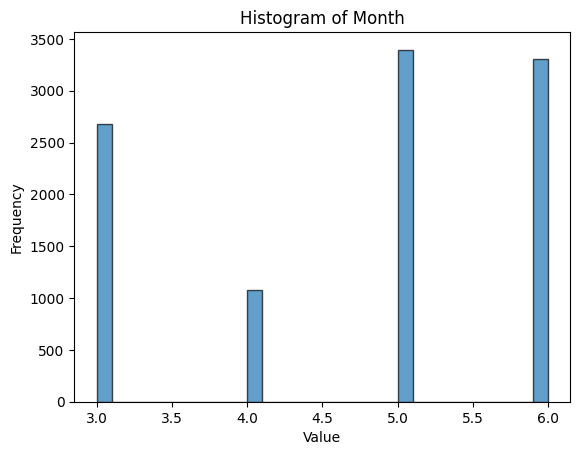

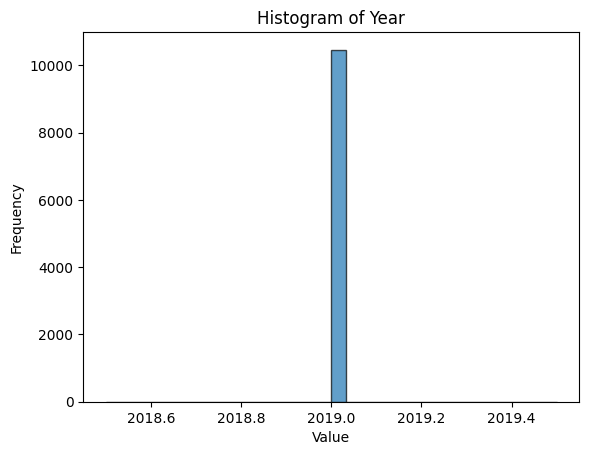

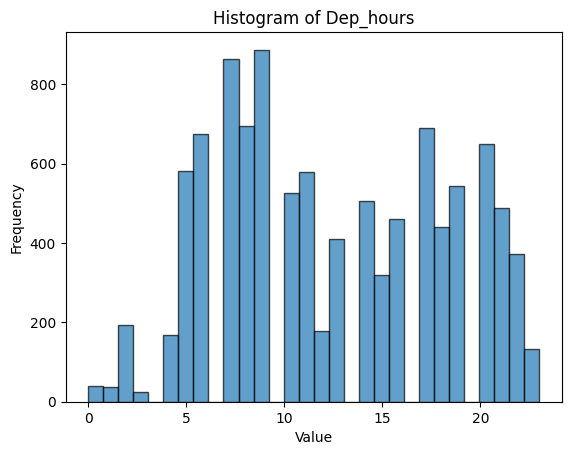

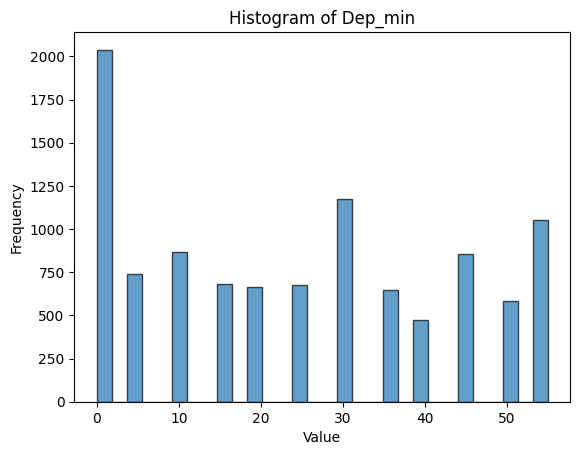

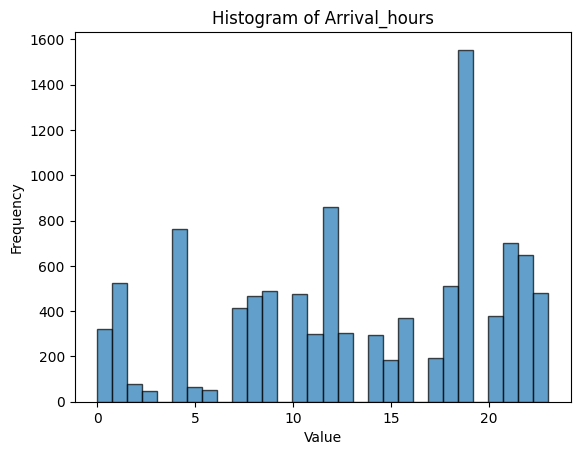

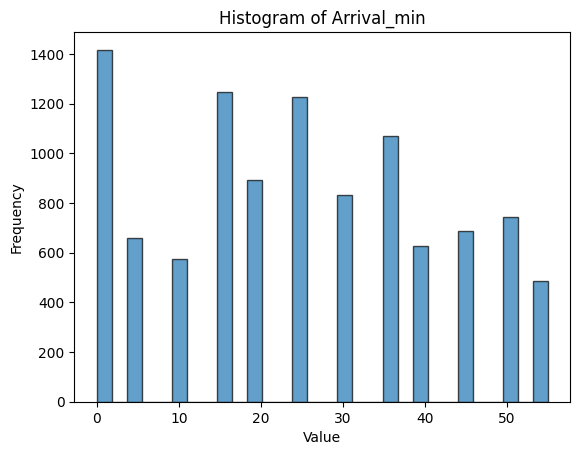

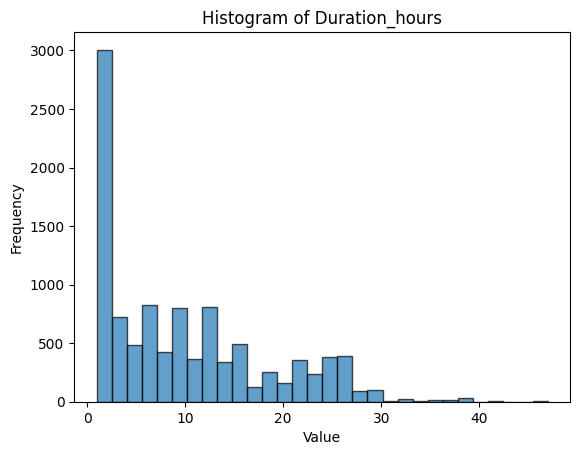

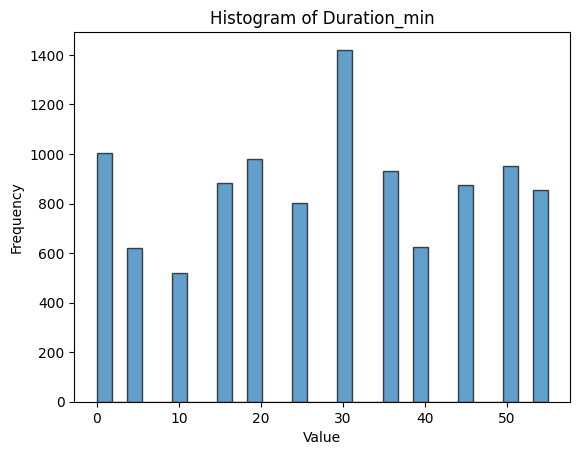

In [13]:
import matplotlib.pyplot as plt
columns=['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']
# Plot histogram
for i in columns:
  plt.hist(df[i], bins=30, edgecolor='k', alpha=0.7)
  plt.title(f'Histogram of {i}')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()


From above chi square test and histogram plot it is clear that most of the column are not uniformly distributed hence zscore will not be much effective hence using IQR technique

In [14]:
#Outlier
#Outliers
col=['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']
for i in col:
  print(f"Features:{i}")
  iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bound=df[i].quantile(0.25)-(1.5*iqr)
  upper_bond=df[i].quantile(0.75)+(1.5*iqr)
  print(f"Lower_bond:{lower_bound},Upper_bond:{upper_bond}")
  df[i]=df[i].clip(lower_bound,upper_bond)
  print(df[i].describe())

Features:Total_Stops
Lower_bond:-1.5,Upper_bond:2.5
count    10461.000000
mean         0.800306
std          0.653922
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.500000
Name: Total_Stops, dtype: float64
Features:Price
Lower_bond:-5459.0,Upper_bond:23029.0
count    10461.000000
mean      8960.771437
std       4266.672455
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12346.000000
max      23029.000000
Name: Price, dtype: float64
Features:Date
Lower_bond:-16.5,Upper_bond:43.5
count    10461.000000
mean        13.462480
std          8.466967
min          1.000000
25%          6.000000
50%         12.000000
75%         21.000000
max         27.000000
Name: Date, dtype: float64
Features:Month
Lower_bond:-1.5,Upper_bond:10.5
count    10461.000000
mean         4.701845
std          1.163624
min          3.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Mo

<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

count    10461.000000
mean        12.476341
std          5.726072
min          0.000000
25%          8.000000
50%         11.000000
75%         18.000000
max         23.000000
Name: Dep_hours, dtype: float64
Features:Dep_min
Lower_bond:-47.5,Upper_bond:92.5
count    10461.000000
mean        24.408278
std         18.817167
min          0.000000
25%          5.000000
50%         25.000000
75%         40.000000
max         55.000000
Name: Dep_min, dtype: float64
Features:Arrival_hours
Lower_bond:-8.5,Upper_bond:35.5
count    10461.000000
mean        13.389638
std          6.853854
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: Arrival_hours, dtype: float64
Features:Arrival_min
Lower_bond:-27.5,Upper_bond:72.5
count    10461.000000
mean        24.723258
std         16.569495
min          0.000000
25%         10.000000
50%         25.000000
75%         35.000000
max         55.000000
Name: Arrival_min, dtype: float64
Featu

<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(lower_bound,upper_bond)
<ipython-input-14-d48a5f89bd55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [15]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [16]:
#EDA
#Airline
Airlines=df.groupby('Airline')['Price'].mean().sort_values(ascending =False)
Airlines


Airline
Jet Airways Business                 23029.000000
Jet Airways                          11499.524865
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10853.566890
Air India                             9522.373451
Vistara Premium economy               8962.333333
Vistara                               7801.761006
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5593.745283
SpiceJet                              4335.549693
Trujet                                4140.000000
Name: Price, dtype: float64

In [17]:
fig = px.bar(x=Airlines.index, y=Airlines.values, title='Average Price by Airline',color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Airline', tickangle=90)
fig.update_yaxes(title_text='Average Price')
fig.show()

In [18]:
#Source
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [19]:
#Source
source=df.groupby('Source')['Price'].mean().sort_values(ascending=False)
source

Source
Delhi       10431.832950
Kolkata      9139.966084
Banglore     7770.190629
Mumbai       5051.545194
Chennai      4789.892388
Name: Price, dtype: float64

In [20]:
fig = px.bar(x=source.index, y=source.values, title='Average Price by Airline',color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Source', tickangle=90)
fig.update_yaxes(title_text='Average Price')
fig.show()

In [21]:
#Destination
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')


<ipython-input-22-91e3f770f5ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
#Destination
df.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [24]:
#Destination
destination=df.groupby('Destination')['Price'].mean().sort_values(ascending=False)
destination

Destination
Cochin       10431.832950
Banglore      9139.966084
Delhi         7770.190629
Hyderabad     5051.545194
Kolkata       4789.892388
Name: Price, dtype: float64

In [25]:
fig = px.bar(x=destination.index, y=destination.values, title='Average Price by Airline',color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Source', tickangle=90)
fig.update_yaxes(title_text='Average Price')
fig.show()

Relationship between source and Destination

In [26]:
df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Date'].astype(str), format='%Y-%m-%d')
# Convert all columns to strings before concatenation to avoid type errors

<ipython-input-26-daef53a8bf95>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01


In [28]:
df[['Source', 'Destination']].describe(include='all')


,Source,Destination
count,10461,10461
unique,5,5
top,Delhi,Cochin
freq,4346,4346


In [29]:
source_counts = df['Source'].value_counts()
source_counts

Source
Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [30]:
destination_counts = df['Destination'].value_counts()
destination_counts

Destination
Cochin       4346
Banglore     2860
Delhi        2177
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [31]:
flight_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')
flight_counts

,Source,Destination,Count
0,Banglore,Delhi,2177
1,Chennai,Kolkata,381
2,Delhi,Cochin,4346
3,Kolkata,Banglore,2860
4,Mumbai,Hyderabad,697


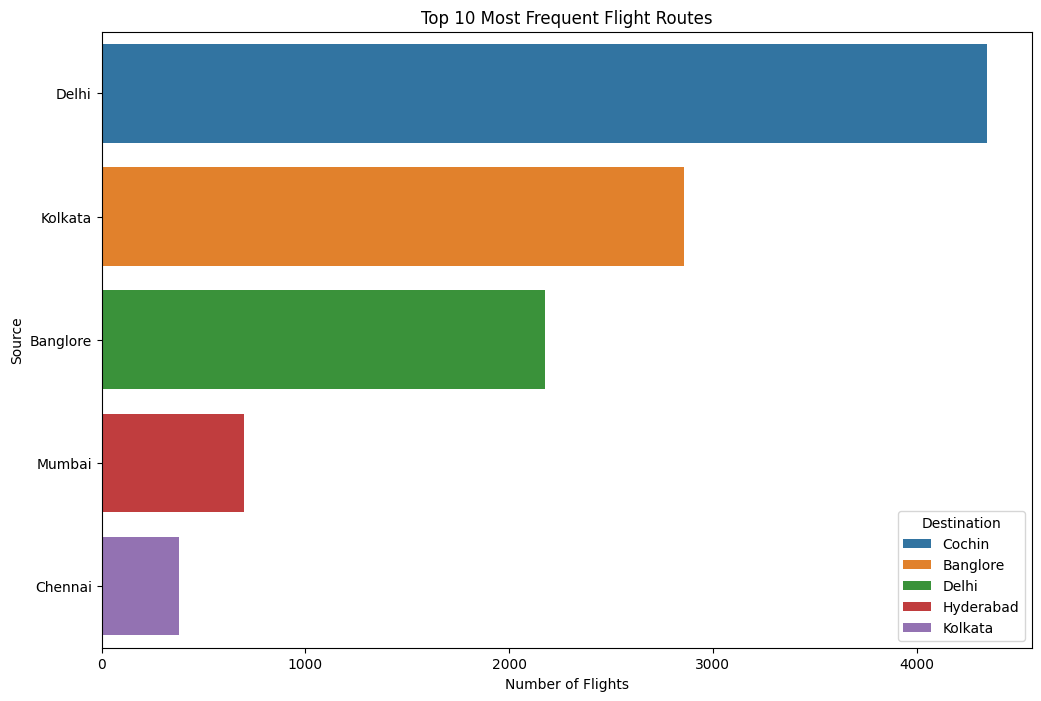

In [32]:
route_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='Count')

# Sort by count and get top routes
top_routes = route_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Source', hue='Destination', data=top_routes, orient='h')
plt.title('Top 10 Most Frequent Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Source')
plt.show()


In [33]:
import pandas as pd

# Create a pivot table
pivot_table = flight_counts.pivot(index='Source', columns='Destination', values='Count').fillna(0)
#The arguments index, columns, and values were previously passed as positional arguments.
#In older versions of pandas, this function only takes the index as a positional argument, with columns and values as keyword arguments.
pivot_table


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata
Source,,,,,
Banglore,0.0,0.0,2177.0,0.0,0.0
Chennai,0.0,0.0,0.0,0.0,381.0
Delhi,0.0,4346.0,0.0,0.0,0.0
Kolkata,2860.0,0.0,0.0,0.0,0.0
Mumbai,0.0,0.0,0.0,697.0,0.0


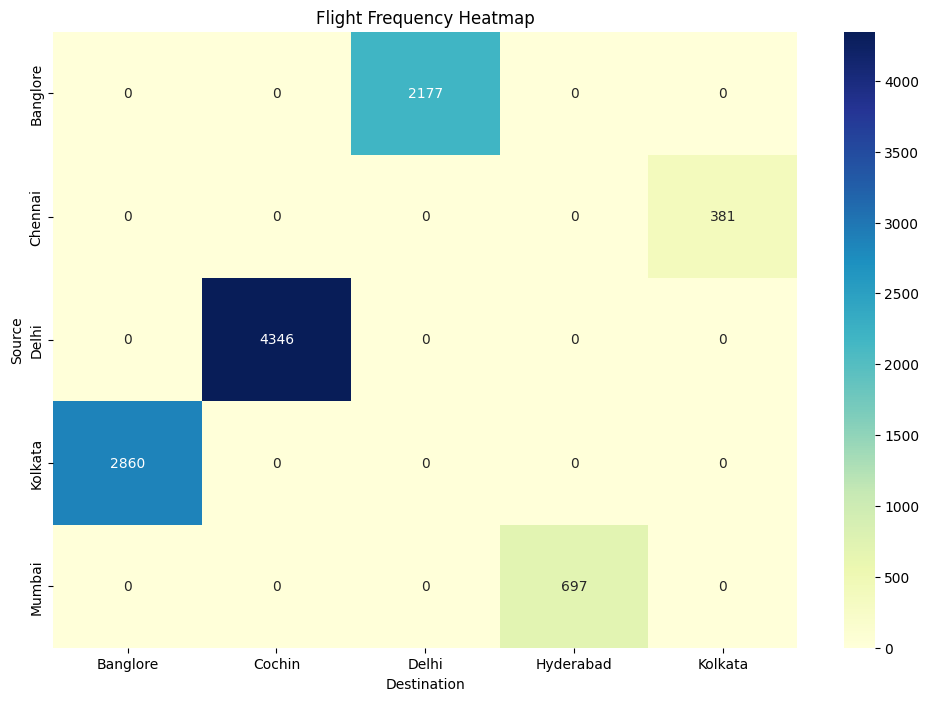

In [34]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Flight Frequency Heatmap')
plt.show()

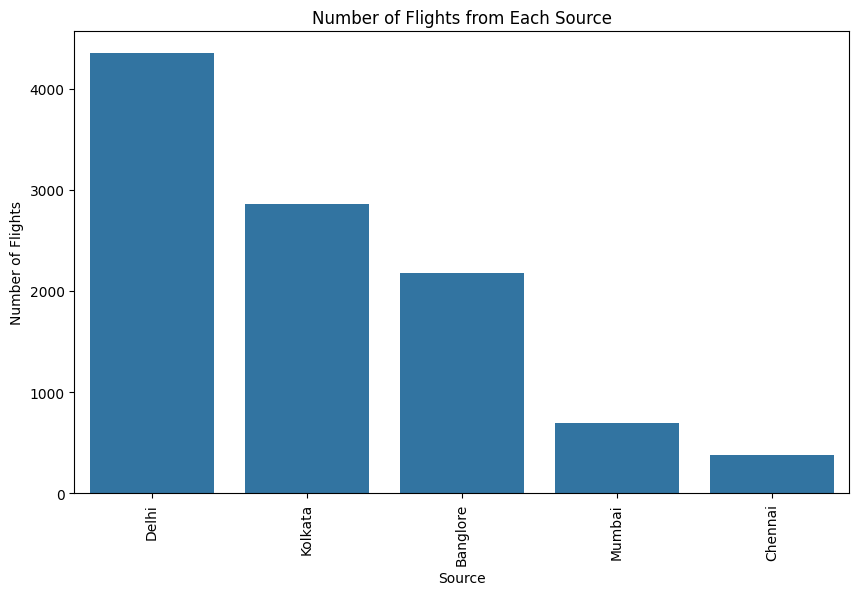

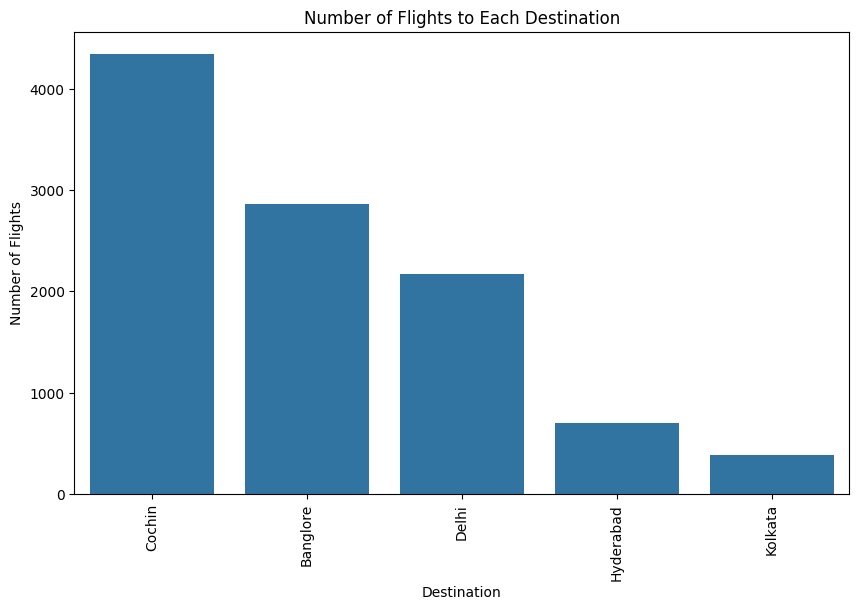

In [35]:
source_counts = df['Source'].value_counts()
destination_counts = df['Destination'].value_counts()

# Plot the number of flights from each source
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Number of Flights from Each Source')
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

# Plot the number of flights to each destination
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Number of Flights to Each Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()


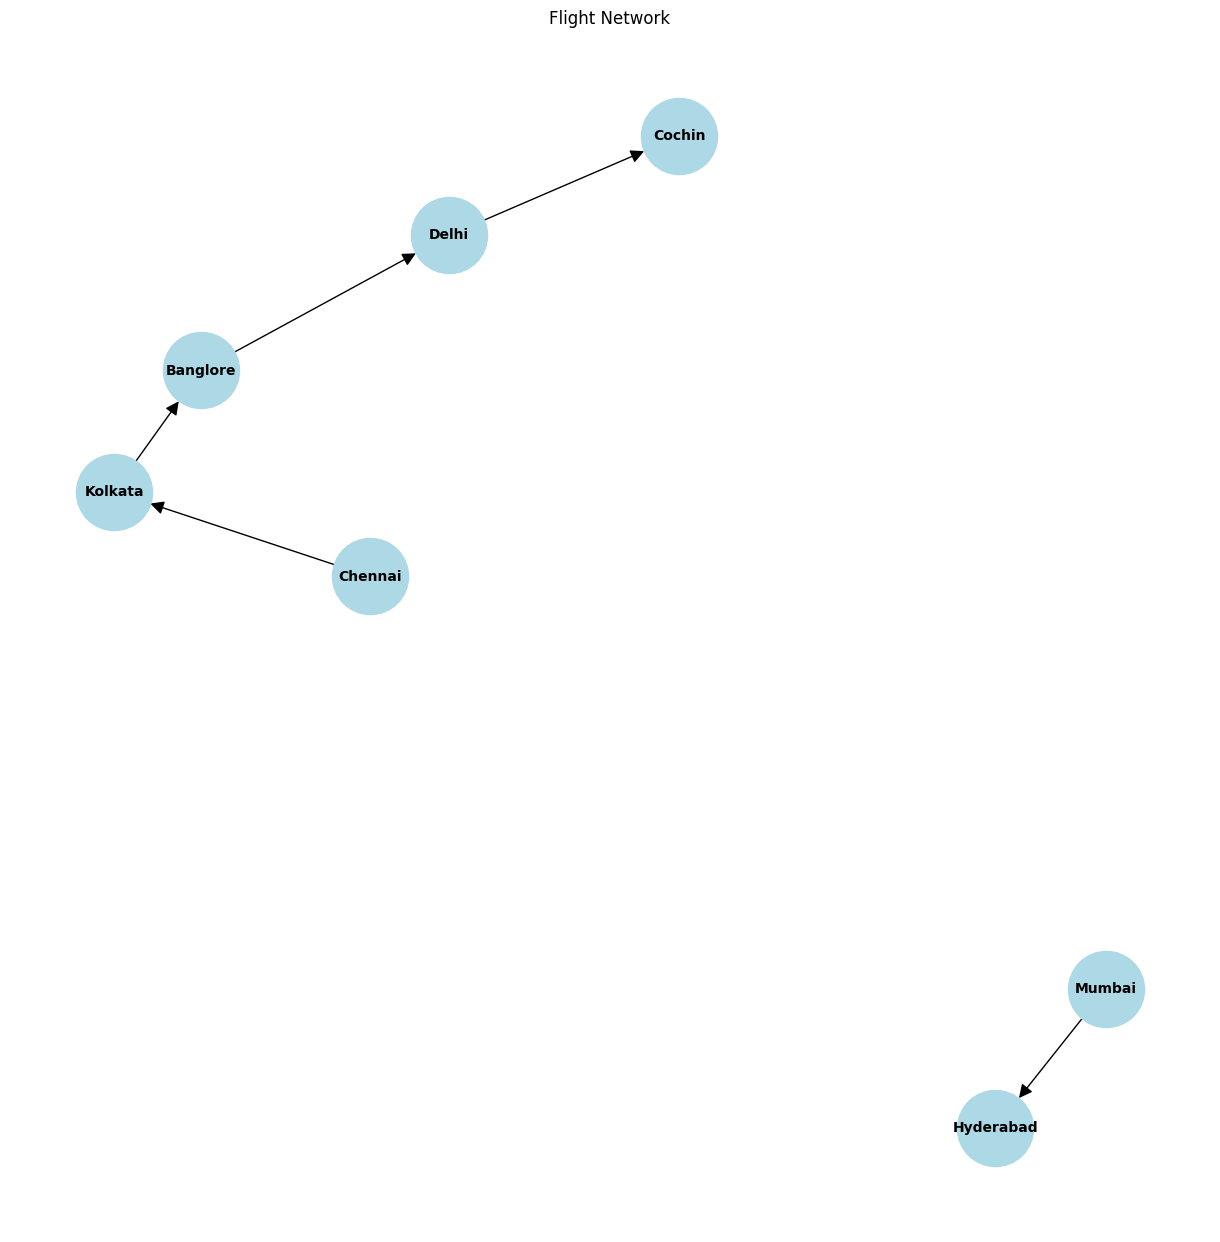

In [36]:
import networkx as nx

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'Source', 'Destination', create_using=nx.DiGraph())

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True, arrowsize=20)
plt.title('Flight Network')
plt.show()


In [37]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min', 'Datetime'],
      dtype='object')

In [38]:
#Total_Stops
df.Total_Stops.unique()

array([0. , 2. , 1. , 2.5])

In [39]:
anomalies = (df['Total_Stops'] == 2.5).value_counts()
print(anomalies)


Total_Stops
False    10417
True        44
Name: count, dtype: int64


In [40]:
# Assuming 'Total_Stops' should be an integer, remove rows with decimal values
df = df[df['Total_Stops'] == df['Total_Stops'].astype(int)]

In [41]:
df.Total_Stops.value_counts()

Total_Stops
1.0    5626
0.0    3473
2.0    1318
Name: count, dtype: int64

In [42]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01


In [43]:
total_stop=df.groupby('Total_Stops')['Price'].mean().sort_values()
total_stop

Total_Stops
0.0     5013.748056
1.0    10491.129221
2.0    12682.014416
Name: Price, dtype: float64

<Axes: xlabel='Total_Stops'>

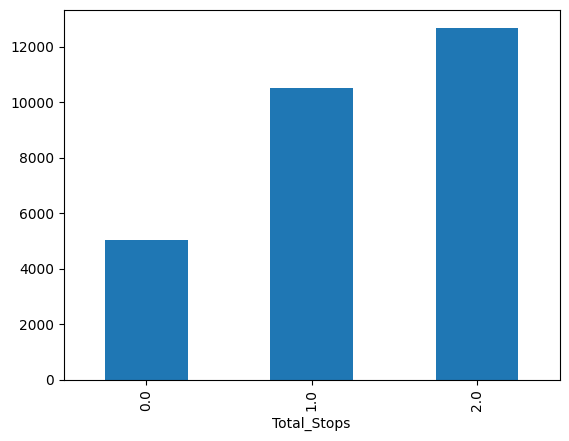

In [44]:
total_stop.plot.bar()

In [45]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min', 'Datetime'],
      dtype='object')

In [46]:
#Month
df.Month.unique()

array([3, 5, 6, 4])

In [47]:
mon=df.groupby('Month')['Price'].mean().sort_index()
mon

Month
3    10416.948872
4     5757.225836
5     9012.478877
6     8719.549454
Name: Price, dtype: float64

<Axes: xlabel='Month'>

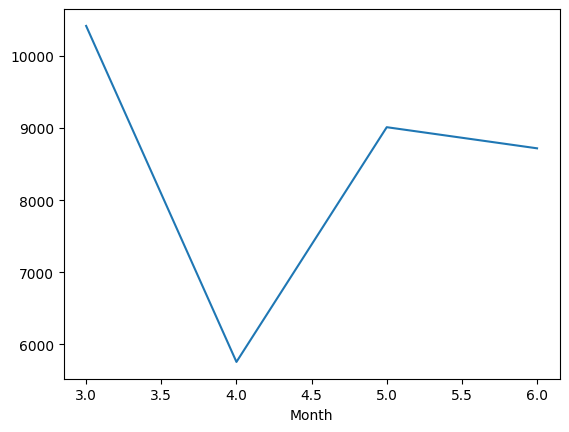

In [48]:
mon.plot()

In [49]:
#Date
df.Date.unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [50]:
date=df.groupby('Date')['Price'].mean().sort_index()
date

Date
1      9955.247383
3      8951.120482
6     10318.240506
9      9439.303650
12     9033.377399
15     8030.811007
18     8480.532595
21     8268.252078
24     8324.445866
27     8053.656566
Name: Price, dtype: float64

<Axes: xlabel='Date'>

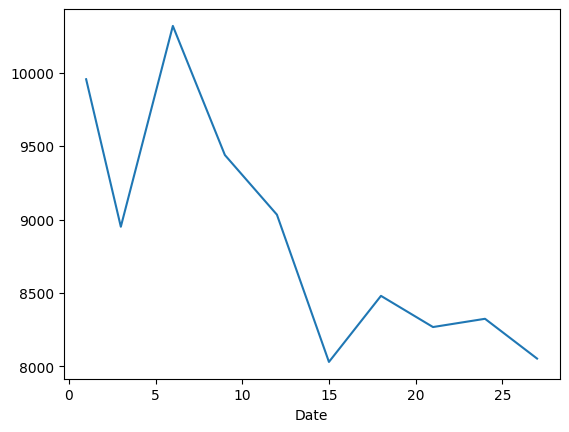

In [51]:
date.plot()

In [52]:
#Year
df.Year.unique()

array([2019])

In [53]:
#Dep_hours
df.Dep_hours.unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

In [54]:
df.Dep_hours.value_counts()

Dep_hours
9     883
7     862
8     694
17    688
6     674
20    649
11    571
5     563
19    544
10    524
14    505
21    488
16    459
18    441
13    411
22    373
15    319
2     194
12    173
4     169
23    132
0      40
1      37
3      24
Name: count, dtype: int64

In [55]:
dep_hour=df.groupby('Dep_hours')['Price'].mean().sort_values(ascending=False)
dep_hour

Dep_hours
3     10474.625000
16    10219.677560
8     10000.182997
18     9904.424036
14     9739.126733
20     9575.318952
9      9482.533409
11     9142.914186
5      9124.934281
12     9012.971098
13     8998.725061
10     8847.095420
17     8694.508721
23     8484.340909
7      8442.267981
21     8437.975410
2      8419.974227
19     8341.602941
6      8237.755193
15     7615.144201
22     7538.702413
0      7449.075000
4      7235.201183
1      4354.621622
Name: Price, dtype: float64

<Axes: xlabel='Dep_hours'>

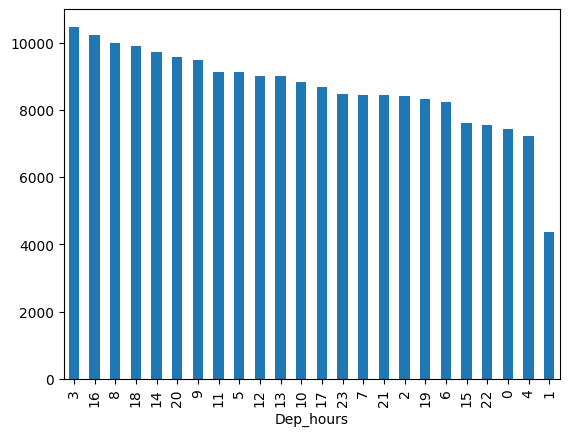

In [56]:
import matplotlib.pyplot as plt

# Assuming 'dep_hour' is a column in your DataFrame 'df'
dep_hour.plot(kind='bar')


In [57]:
#Dep_min
df.Dep_min.unique()

array([20, 50, 25,  5,  0, 55, 45, 40, 10, 15, 35, 30])

In [58]:
#Creating new column
df['Departure_time']=df['Dep_hours'].astype(str)+":"+df['Dep_min'].astype(str)

<ipython-input-58-2fa305304e52>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df.Departure_time.unique()

array(['22:20', '5:50', '9:25', '18:5', '16:50', '9:0', '18:55', '8:0',
       '8:55', '11:25', '9:45', '20:20', '11:40', '21:10', '17:15',
       '16:40', '8:45', '14:0', '20:15', '16:0', '14:10', '22:0', '4:0',
       '21:25', '21:50', '7:0', '7:5', '9:50', '14:35', '10:35', '15:5',
       '14:15', '6:45', '20:55', '11:10', '5:45', '19:0', '23:5', '11:0',
       '9:35', '21:15', '23:55', '19:45', '8:50', '15:40', '6:5', '15:0',
       '13:55', '5:55', '13:20', '5:5', '6:25', '17:30', '8:20', '19:55',
       '6:30', '14:5', '2:0', '9:40', '8:25', '20:25', '13:15', '2:15',
       '16:55', '20:45', '5:15', '19:50', '20:0', '6:10', '19:30', '4:45',
       '12:55', '18:15', '17:20', '15:25', '23:0', '12:0', '14:45',
       '11:50', '11:30', '14:40', '19:10', '6:0', '23:30', '7:35', '13:5',
       '12:30', '15:10', '12:50', '18:25', '16:30', '0:40', '6:50',
       '13:0', '19:15', '1:30', '17:0', '10:0', '19:35', '15:30', '12:10',
       '16:10', '20:35', '22:25', '21:5', '5:35', '5:10', '

In [60]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime,Departure_time
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24,22:20
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01,5:50
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09,9:25
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12,18:5
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01,16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09,19:55
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27,20:45
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27,8:20
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01,11:30


In [61]:
df['Arrival_time']=df['Arrival_hours'].astype(str)+":"+df['Arrival_min'].astype(str)


<ipython-input-61-de597f56e332>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime,Departure_time,Arrival_time
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24,22:20,1:10
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01,5:50,13:15
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09,9:25,4:25
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12,18:5,23:30
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01,16:50,21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09,19:55,22:25
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27,20:45,23:20
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27,8:20,11:20
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01,11:30,14:10


In [63]:
df['Duration_time']=df['Duration_hours'].astype(str)+":"+df['Duration_min'].astype(str)

<ipython-input-63-ca4d5a48d263>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime,Departure_time,Arrival_time,Duration_time
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24,22:20,1:10,2.0:50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01,5:50,13:15,7.0:25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09,9:25,4:25,19.0:0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12,18:5,23:30,5.0:25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01,16:50,21:35,4.0:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09,19:55,22:25,2.0:30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27,20:45,23:20,2.0:35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27,8:20,11:20,3.0:0
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01,11:30,14:10,2.0:40


In [65]:
#Analysing Departure_time,Arrival_time,Duration_time
# Check data types
print(df[['Departure_time', 'Arrival_time', 'Duration_time']].dtypes)

# Check for missing values
print(df[['Departure_time', 'Arrival_time', 'Duration_time']].isnull().sum())

Departure_time    object
Arrival_time      object
Duration_time     object
dtype: object
Departure_time    0
Arrival_time      0
Duration_time     0
dtype: int64


In [66]:
df['Departure_time'] = pd.to_datetime(df['Departure_time'], format='%H:%M').dt.strftime('%H:%M')
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M').dt.strftime('%H:%M')
df['Duration_time'] = pd.to_datetime(df['Duration_hours'] * 60 + df['Duration_min'], unit='m').dt.strftime('%H:%M')

<ipython-input-66-ea7aa14aa0a0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-ea7aa14aa0a0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-ea7aa14aa0a0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime,Departure_time,Arrival_time,Duration_time
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24,22:20,01:10,02:50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01,05:50,13:15,07:25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09,09:25,04:25,19:00
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12,18:05,23:30,05:25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01,16:50,21:35,04:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09,19:55,22:25,02:30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27,20:45,23:20,02:35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27,08:20,11:20,03:00
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01,11:30,14:10,02:40


In [68]:
# Convert 'Departure_time' and 'Arrival_time' back to datetime
df['Departure_time'] = pd.to_datetime(df['Departure_time'], format='%H:%M')
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M')

# Define time of day periods
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df['Departure_period'] = df['Departure_time'].dt.hour.apply(time_of_day)
df['Arrival_period'] = df['Arrival_time'].dt.hour.apply(time_of_day)

df['Departure_time'] = pd.to_datetime(df['Departure_time'], format='%H:%M').dt.strftime('%H:%M')
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M').dt.strftime('%H:%M')

<ipython-input-68-eec72a3c4330>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-eec72a3c4330>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-eec72a3c4330>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-eec72a

In [69]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Datetime,Departure_time,Arrival_time,Duration_time,Departure_period,Arrival_period
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,2019,22,20,1,10,2.0,50,2019-03-24,22:20,01:10,02:50,Night,Night
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7.0,25,2019-05-01,05:50,13:15,07:25,Night,Afternoon
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19.0,0,2019-06-09,09:25,04:25,19:00,Morning,Night
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5.0,25,2019-05-12,18:05,23:30,05:25,Night,Night
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,2019,16,50,21,35,4.0,45,2019-03-01,16:50,21:35,04:45,Afternoon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,2019,19,55,22,25,2.0,30,2019-04-09,19:55,22:25,02:30,Night,Night
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,2019,20,45,23,20,2.0,35,2019-04-27,20:45,23:20,02:35,Night,Night
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,2019,8,20,11,20,3.0,0,2019-04-27,08:20,11:20,03:00,Morning,Morning
10681,Vistara,Banglore,Delhi,0.0,12648,1,3,2019,11,30,14,10,2.0,40,2019-03-01,11:30,14:10,02:40,Morning,Afternoon


In [70]:
# Calculate average price for each departure period
departure_price = df.groupby('Departure_period')['Price'].mean()

# Calculate average price for each arrival period
arrival_price = df.groupby('Arrival_period')['Price'].mean()

# Print the results
print(departure_price)
print(arrival_price)


Departure_period
Afternoon    9110.709980
Morning      9030.220532
Night        8722.961959
Name: Price, dtype: float64
Arrival_period
Afternoon    8394.879891
Morning      8027.787907
Night        9472.188204
Name: Price, dtype: float64


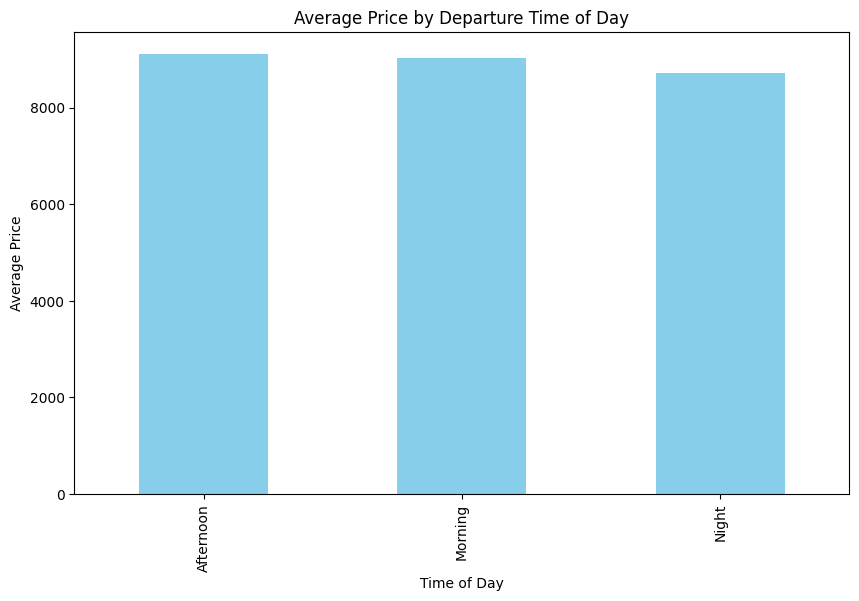

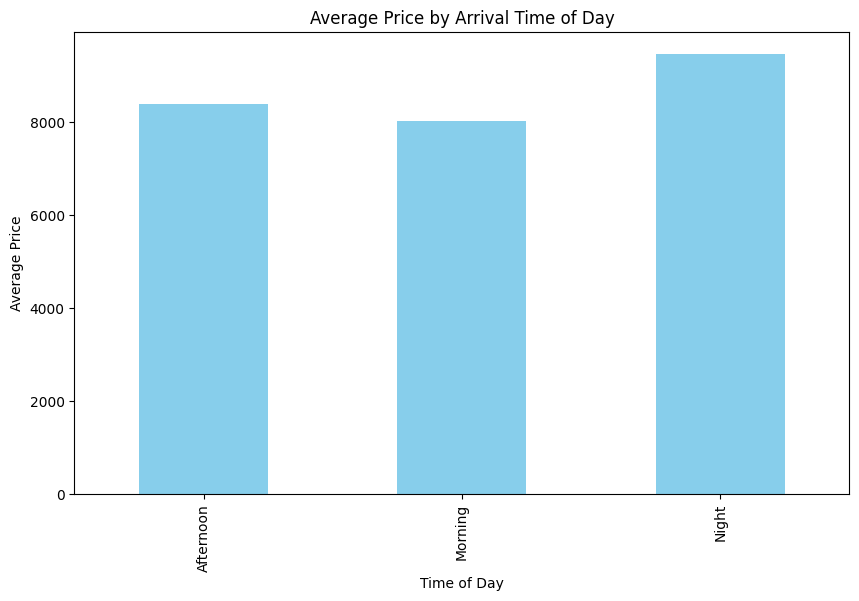

In [71]:
import matplotlib.pyplot as plt

# Plot average price by departure period
plt.figure(figsize=(10, 6))
departure_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Departure Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.show()

# Plot average price by arrival period
plt.figure(figsize=(10, 6))
arrival_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Arrival Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.show()


In [72]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min', 'Datetime', 'Departure_time',
       'Arrival_time', 'Duration_time', 'Departure_period', 'Arrival_period'],
      dtype='object')

In [73]:
df1=df[['Airline','Source','Destination','Total_Stops','Date','Month','Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min','Departure_period','Arrival_period','Price']]

In [74]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,IndiGo,Banglore,Delhi,0.0,24,3,22,20,1,10,2.0,50,Night,Night,3897
1,Air India,Kolkata,Banglore,2.0,1,5,5,50,13,15,7.0,25,Night,Afternoon,7662
2,Jet Airways,Delhi,Cochin,2.0,9,6,9,25,4,25,19.0,0,Morning,Night,13882
3,IndiGo,Kolkata,Banglore,1.0,12,5,18,5,23,30,5.0,25,Night,Night,6218
4,IndiGo,Banglore,Delhi,1.0,1,3,16,50,21,35,4.0,45,Afternoon,Night,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,9,4,19,55,22,25,2.0,30,Night,Night,4107
10679,Air India,Kolkata,Banglore,0.0,27,4,20,45,23,20,2.0,35,Night,Night,4145
10680,Jet Airways,Banglore,Delhi,0.0,27,4,8,20,11,20,3.0,0,Morning,Morning,7229
10681,Vistara,Banglore,Delhi,0.0,1,3,11,30,14,10,2.0,40,Morning,Afternoon,12648


In [75]:
df1.dtypes

Airline              object
Source               object
Destination          object
Total_Stops         float64
Date                  int64
Month                 int64
Dep_hours             int64
Dep_min               int64
Arrival_hours         int64
Arrival_min           int64
Duration_hours      float64
Duration_min          int64
Departure_period     object
Arrival_period       object
Price                 int64
dtype: object

In [76]:
#Encode
#Airline
df1.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [77]:
df1.Airline.value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1659
Multiple carriers                    1188
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [78]:
df1['Airline']=df1['Airline'].map({'Trujet':0,'Vistara Premium economy':1,'Jet Airways Business':2,'Multiple carriers Premium economy':3,'GoAir':4,'Air Asia':5,'Vistara':6,'SpiceJet':7,'Multiple carriers':8,'Air India':9,'IndiGo':10,'Jet Airways':11})

<ipython-input-78-ff2022418b89>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,Banglore,Delhi,0.0,24,3,22,20,1,10,2.0,50,Night,Night,3897
1,9,Kolkata,Banglore,2.0,1,5,5,50,13,15,7.0,25,Night,Afternoon,7662
2,11,Delhi,Cochin,2.0,9,6,9,25,4,25,19.0,0,Morning,Night,13882
3,10,Kolkata,Banglore,1.0,12,5,18,5,23,30,5.0,25,Night,Night,6218
4,10,Banglore,Delhi,1.0,1,3,16,50,21,35,4.0,45,Afternoon,Night,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,Kolkata,Banglore,0.0,9,4,19,55,22,25,2.0,30,Night,Night,4107
10679,9,Kolkata,Banglore,0.0,27,4,20,45,23,20,2.0,35,Night,Night,4145
10680,11,Banglore,Delhi,0.0,27,4,8,20,11,20,3.0,0,Morning,Morning,7229
10681,6,Banglore,Delhi,0.0,1,3,11,30,14,10,2.0,40,Morning,Afternoon,12648


In [80]:
#Source
df1.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [81]:
df1.Source.value_counts()

Source
Delhi       4323
Kolkata     2849
Banglore    2169
Mumbai       695
Chennai      381
Name: count, dtype: int64

In [82]:
df1['Source']=df1['Source'].map({'Chennai':0,'Mumbai':1,'Banglore':2,'Kolkata':3,'Delhi':4})

<ipython-input-82-01e9fd997549>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,2,Delhi,0.0,24,3,22,20,1,10,2.0,50,Night,Night,3897
1,9,3,Banglore,2.0,1,5,5,50,13,15,7.0,25,Night,Afternoon,7662
2,11,4,Cochin,2.0,9,6,9,25,4,25,19.0,0,Morning,Night,13882
3,10,3,Banglore,1.0,12,5,18,5,23,30,5.0,25,Night,Night,6218
4,10,2,Delhi,1.0,1,3,16,50,21,35,4.0,45,Afternoon,Night,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,3,Banglore,0.0,9,4,19,55,22,25,2.0,30,Night,Night,4107
10679,9,3,Banglore,0.0,27,4,20,45,23,20,2.0,35,Night,Night,4145
10680,11,2,Delhi,0.0,27,4,8,20,11,20,3.0,0,Morning,Morning,7229
10681,6,2,Delhi,0.0,1,3,11,30,14,10,2.0,40,Morning,Afternoon,12648


In [84]:
#Destination
df1.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [85]:
df1.Destination.value_counts()

Destination
Cochin       4323
Banglore     2849
Delhi        2169
Hyderabad     695
Kolkata       381
Name: count, dtype: int64

In [86]:
df1['Destination']=df1['Destination'].map({'Kolkata':0,'Hyderabad':1,'Delhi':2,'Banglore':3,'Cochin':4})

<ipython-input-86-7cfff71413ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,2,2,0.0,24,3,22,20,1,10,2.0,50,Night,Night,3897
1,9,3,3,2.0,1,5,5,50,13,15,7.0,25,Night,Afternoon,7662
2,11,4,4,2.0,9,6,9,25,4,25,19.0,0,Morning,Night,13882
3,10,3,3,1.0,12,5,18,5,23,30,5.0,25,Night,Night,6218
4,10,2,2,1.0,1,3,16,50,21,35,4.0,45,Afternoon,Night,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,3,3,0.0,9,4,19,55,22,25,2.0,30,Night,Night,4107
10679,9,3,3,0.0,27,4,20,45,23,20,2.0,35,Night,Night,4145
10680,11,2,2,0.0,27,4,8,20,11,20,3.0,0,Morning,Morning,7229
10681,6,2,2,0.0,1,3,11,30,14,10,2.0,40,Morning,Afternoon,12648


In [88]:
#Departure_period
df1.Departure_period.unique()

array(['Night', 'Morning', 'Afternoon'], dtype=object)

In [89]:
df1.Departure_period.value_counts()

Departure_period
Morning      4208
Night        3654
Afternoon    2555
Name: count, dtype: int64

In [90]:
df1['Departure_period']=df1['Departure_period'].map({'Afternoon':0,'Night':1,'Morning':2})

<ipython-input-90-839db4bcae2d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,2,2,0.0,24,3,22,20,1,10,2.0,50,1,Night,3897
1,9,3,3,2.0,1,5,5,50,13,15,7.0,25,1,Afternoon,7662
2,11,4,4,2.0,9,6,9,25,4,25,19.0,0,2,Night,13882
3,10,3,3,1.0,12,5,18,5,23,30,5.0,25,1,Night,6218
4,10,2,2,1.0,1,3,16,50,21,35,4.0,45,0,Night,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,3,3,0.0,9,4,19,55,22,25,2.0,30,1,Night,4107
10679,9,3,3,0.0,27,4,20,45,23,20,2.0,35,1,Night,4145
10680,11,2,2,0.0,27,4,8,20,11,20,3.0,0,2,Morning,7229
10681,6,2,2,0.0,1,3,11,30,14,10,2.0,40,2,Afternoon,12648


In [92]:
#Arrival_period
df1.Arrival_period.unique()

array(['Night', 'Afternoon', 'Morning'], dtype=object)

In [93]:
df1.Arrival_period.value_counts()

Arrival_period
Night        6036
Afternoon    2198
Morning      2183
Name: count, dtype: int64

In [94]:
df1['Arrival_period']=df['Arrival_period'].map({'Morning':0,'Afternoon':1,'Night':2})

<ipython-input-94-b4005376c22f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,2,2,0.0,24,3,22,20,1,10,2.0,50,1,2,3897
1,9,3,3,2.0,1,5,5,50,13,15,7.0,25,1,1,7662
2,11,4,4,2.0,9,6,9,25,4,25,19.0,0,2,2,13882
3,10,3,3,1.0,12,5,18,5,23,30,5.0,25,1,2,6218
4,10,2,2,1.0,1,3,16,50,21,35,4.0,45,0,2,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,3,3,0.0,9,4,19,55,22,25,2.0,30,1,2,4107
10679,9,3,3,0.0,27,4,20,45,23,20,2.0,35,1,2,4145
10680,11,2,2,0.0,27,4,8,20,11,20,3.0,0,2,0,7229
10681,6,2,2,0.0,1,3,11,30,14,10,2.0,40,2,1,12648


In [96]:
df1['Total_Stops']=df1['Total_Stops'].astype(int)
df1['Duration_hours']=df1['Duration_hours'].astype(int)

<ipython-input-96-aee285c46d31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-aee285c46d31>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df1.dtypes

Airline             int64
Source              int64
Destination         int64
Total_Stops         int64
Date                int64
Month               int64
Dep_hours           int64
Dep_min             int64
Arrival_hours       int64
Arrival_min         int64
Duration_hours      int64
Duration_min        int64
Departure_period    int64
Arrival_period      int64
Price               int64
dtype: object

In [98]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Departure_period,Arrival_period,Price
0,10,2,2,0,24,3,22,20,1,10,2,50,1,2,3897
1,9,3,3,2,1,5,5,50,13,15,7,25,1,1,7662
2,11,4,4,2,9,6,9,25,4,25,19,0,2,2,13882
3,10,3,3,1,12,5,18,5,23,30,5,25,1,2,6218
4,10,2,2,1,1,3,16,50,21,35,4,45,0,2,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5,3,3,0,9,4,19,55,22,25,2,30,1,2,4107
10679,9,3,3,0,27,4,20,45,23,20,2,35,1,2,4145
10680,11,2,2,0,27,4,8,20,11,20,3,0,2,0,7229
10681,6,2,2,0,1,3,11,30,14,10,2,40,2,1,12648


In [99]:
#Split
from sklearn.model_selection import train_test_split
x=df1.drop('Price',axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [100]:
x_train.shape,x_test.shape

((7812, 14), (2605, 14))

In [101]:
#Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [102]:
#Model
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)


array([ 9979.40095894, 11037.9867145 , 13422.82498525, ...,
        9120.97745858, 11718.1438768 , 11979.59690755])

In [103]:
#R2_score
model.score(x_train,y_train)

0.5181119542044919

In [104]:
#MSE
mean_squared_error(y_test,model.predict(x_test))

9483833.891729498

In [105]:
#Mean Absolute Error
mean_absolute_error(y_test,model.predict(x_test))

2293.7605994244327

In [106]:
#Intecept and coeff
model.coef_,model.intercept_

(array([ 790.05264194,  118.36324716,  118.36324716, 2068.3992607 ,
        -649.00585485, -662.93311913,  201.98199208, -122.34746742,
         -50.10265314,  -23.41036281,  514.8391917 , -155.93744277,
         211.85565577,  241.1957314 ]),
 8933.028801843318)

In [107]:
##Decision_Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
#model.predict(x_test_scaled)
model.score(x_test,y_test)



0.7160824515053481

In [108]:
#Finding Hyperparameter
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
  #print(f"depth:{i}")
  model=DecisionTreeRegressor(max_depth=i)
  model.fit(x_train,y_train)
  model.predict(x_test)
  train_sc=model.score(x_train,y_train)
  c_v=np.mean(cross_val_score(model,x_train,y_train,cv=10))
  print(f"train_sc:{train_sc},cross_va={c_v},dep:{i}")

train_sc:0.44388698917997693,cross_va=0.43871944829876136,dep:1
train_sc:0.5207788076754563,cross_va=0.5164908171471493,dep:2
train_sc:0.580914009032719,cross_va=0.5658585617456598,dep:3
train_sc:0.6540164345584651,cross_va=0.6433488954181282,dep:4
train_sc:0.7230606529048861,cross_va=0.7100582243154767,dep:5
train_sc:0.7529837628946743,cross_va=0.7318482724514651,dep:6
train_sc:0.7893459269462987,cross_va=0.7531231328639173,dep:7
train_sc:0.8258382033036207,cross_va=0.7797916251533993,dep:8
train_sc:0.8543968426769807,cross_va=0.7950826813274883,dep:9
train_sc:0.8792826234492986,cross_va=0.7969305009259606,dep:10
train_sc:0.8986822717017673,cross_va=0.7928686930400644,dep:11
train_sc:0.9170480666061354,cross_va=0.7839027521754934,dep:12
train_sc:0.9341323598709416,cross_va=0.773080136878408,dep:13
train_sc:0.9449443613521487,cross_va=0.7605358331420895,dep:14
train_sc:0.9524251343270891,cross_va=0.7479546897575652,dep:15
train_sc:0.9577213906284553,cross_va=0.7403030055674796,dep:16
t

In [109]:
#Decision_Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=11)
model.fit(x_train,y_train)
#model.predict(x_test_scaled)
model.score(x_test,y_test)


0.7914432765206022

In [110]:
#Random Forest
#Finding best hyperparamter
import math
from sklearn.ensemble import RandomForestRegressor
max_dep = round(math.log2(15))

model = RandomForestRegressor(max_depth =max_dep, max_features = "sqrt")
for i in [10,20,30,50,100,200,300,500,600,700,1000,1300,1500,1800]:
    model = RandomForestRegressor(n_estimators = i, max_depth = max_dep, max_features = "sqrt")
    cross_score = np.mean(cross_val_score(model, x_train, y_train, cv = 10))
    print(f"N: {i}, Cross-Val Score: {cross_score}")



N: 10, Cross-Val Score: 0.6053538903200595
N: 20, Cross-Val Score: 0.6134402066305271
N: 30, Cross-Val Score: 0.6140169953213221
N: 50, Cross-Val Score: 0.6139371555481784
N: 100, Cross-Val Score: 0.6152401808887863
N: 200, Cross-Val Score: 0.617026619863858
N: 300, Cross-Val Score: 0.6174735309967639
N: 500, Cross-Val Score: 0.6180860031066403
N: 600, Cross-Val Score: 0.6183637607858176
N: 700, Cross-Val Score: 0.617398953256767
N: 1000, Cross-Val Score: 0.6182733719223283
N: 1300, Cross-Val Score: 0.6184180536912594
N: 1500, Cross-Val Score: 0.6170734318734101
N: 1800, Cross-Val Score: 0.6176124914070915


In [111]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
max_dep = round(math.log2(15))

model = RandomForestRegressor(n_estimators = 1300, max_depth =max_dep, max_features = "sqrt")
model.fit(x_train, y_train)
print(f"Test data accuracy : {model.score(x_test, y_test)}") # Call the imported f1_score function

Test data accuracy : 0.620762713704273


In [112]:
from xgboost import XGBRegressor
for lamb in [0.001, 0.002, 0.005, 0.006, 0.1, 0.2,0.21, 0.23,0.25]:
  model = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, x_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.13099247986164983
Lambda: 0.002, Cross-Val Score: 0.2410819875744484
Lambda: 0.005, Cross-Val Score: 0.46953275109270376
Lambda: 0.006, Cross-Val Score: 0.5213002765818799
Lambda: 0.1, Cross-Val Score: 0.8488946725701416
Lambda: 0.2, Cross-Val Score: 0.8555613487023562
Lambda: 0.21, Cross-Val Score: 0.8536193172837008
Lambda: 0.23, Cross-Val Score: 0.8540437741948594
Lambda: 0.25, Cross-Val Score: 0.8526560447866416


In [113]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor # Import the XGBRegressor

# # Define the parameter grid
# param_grid = {
#     'reg_alpha': [0.01, 0.1, 1],
#     'reg_lambda': [0.1, 1, 10],
#     'gamma': [0, 0.01, 0.1]
# }

# # Create and train an XGBRegressor model
# xgb_model = XGBRegressor() # Create the XGBRegressor object

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the grid search to the data
# grid_search.fit(x_train, y_train)

# # Get the best parameters
# print(grid_search.best_params_)

In [114]:
# from xgboost import XGBRegressor

# # Create and train an XGBRegressor model with the best parameters
# xgb_model = XGBRegressor(gamma=0, reg_alpha=1, reg_lambda=10)

# # Fit the model to the training data
# xgb_model.fit(x_train, y_train)

# # Make predictions on the test data
# y_pred = xgb_model.predict(x_test)

# # Evaluate the model using Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# # Evaluate the model using R-squared
# r2 = r2_score(y_test, y_pred)
# print(f"R-squared: {r2}")

In [115]:
# # prompt: need code for XGBRegressor

# model = XGBRegressor(learning_rate = 0.23)
# model.fit(x_train, y_train)
# print(f"Test data accuracy : {model.score(x_test, y_test)}")


In [116]:
# from xgboost import XGBRegressor

# model = XGBRegressor(learning_rate=0.2, max_depth=max_dep, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)
# model.fit(x_train, y_train)

# test_score = model.score(x_test, y_test)
# print(f"Test data R^2 score with regularization: {test_score}")


In [117]:
# from xgboost import XGBRegressor
# # model = XGBRegressor(learning_rate = 0.2)
# model.fit(x_train, y_train)
# print(f"Test data accuracy : {model.score(x_test, y_test)}")

In [119]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Define the model with hyperparameters
max_dep = 6  # Example value; adjust based on your tuning
model = XGBRegressor(learning_rate=0.2, max_depth=max_dep, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Adjust this based on your actual preprocessing needs
    ('regressor', model)
])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average CV R^2 score: {cv_scores.mean()}")

# Train the model on the entire training set
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model on the test set
test_r2 = r2_score(y_test, y_pred)
print(f"Test data R^2 score: {test_r2}")

# For additional insight, calculate MSE and RMSE
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = test_mse ** 0.5
print(f"Test data MSE: {test_mse}")
print(f"Test data RMSE: {test_rmse}")


Cross-validation R^2 scores: [0.84625248 0.85646693 0.8504911  0.84947577 0.83390362]
Average CV R^2 score: 0.8473179789720348
Test data R^2 score: 0.847813605577724
Test data MSE: 2701525.318245215
Test data RMSE: 1643.6317465433717
